In [300]:
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
import numpy as np
import missingno

from IPython import display

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from category_encoders import BinaryEncoder

In [165]:
df = pd.read_csv("train_data.csv")
df.describe()

,event_id,time_to_tca,mission_id,risk,max_risk_estimate,max_risk_scaling,miss_distance,relative_speed,relative_position_r,relative_position_t,relative_position_n,relative_velocity_r,relative_velocity_t,relative_velocity_n,t_time_lastob_start,t_time_lastob_end,t_recommended_od_span,t_actual_od_span,t_obs_available,t_obs_used,t_residuals_accepted,t_weighted_rms,t_rcs_estimate,t_cd_area_over_mass,t_cr_area_over_mass,t_sedr,t_j2k_sma,t_j2k_ecc,t_j2k_inc,t_ct_r,t_cn_r,t_cn_t,t_crdot_r,t_crdot_t,t_crdot_n,t_ctdot_r,t_ctdot_t,t_ctdot_n,t_ctdot_rdot,t_cndot_r,t_cndot_t,t_cndot_n,t_cndot_rdot,t_cndot_tdot,c_time_lastob_start,c_time_lastob_end,c_recommended_od_span,c_actual_od_span,c_obs_available,c_obs_used,c_residuals_accepted,c_weighted_rms,c_rcs_estimate,c_cd_area_over_mass,c_cr_area_over_mass,c_sedr,c_j2k_sma,c_j2k_ecc,c_j2k_inc,c_ct_r,c_cn_r,c_cn_t,c_crdot_r,c_crdot_t,c_crdot_n,c_ctdot_r,c_ctdot_t,c_ctdot_n,c_ctdot_rdot,c_cndot_r,c_cndot_t,c_cndot_n,c_cndot_rdot,c_cndot_tdot,t_span,c_span,t_h_apo,t_h_per,c_h_apo,c_h_per,geocentric_latitude,azimuth,elevation,mahalanobis_distance,t_position_covariance_det,c_position_covariance_det,t_sigma_r,c_sigma_r,t_sigma_t,c_sigma_t,t_sigma_n,c_sigma_n,t_sigma_rdot,c_sigma_rdot,t_sigma_tdot,c_sigma_tdot,t_sigma_ndot,c_sigma_ndot,F10,F3M,SSN,AP
count,162634.000000,162634.000000,162634.000000,162634.000000,162634.000000,1.626340e+05,162634.000000,162634.000000,162634.000000,162634.000000,162634.000000,162634.000000,162634.000000,162634.000000,162634.000000,162634.000000,162634.000000,162634.000000,162634.000000,162634.000000,162634.000000,162634.000000,159357.000000,162634.000000,162634.000000,162634.000000,162634.000000,162634.000000,162634.000000,162634.000000,162634.000000,162634.000000,153404.000000,153404.000000,153404.000000,153404.000000,153404.000000,153404.000000,153404.000000,153404.000000,153404.000000,153404.000000,153404.000000,153404.000000,162623.000000,162623.000000,162623.000000,162623.000000,162623.000000,162623.000000,162623.000000,162623.000000,109793.000000,162634.000000,162634.000000,162634.000000,162634.000000,162634.000000,162634.000000,162623.000000,162623.000000,162623.000000,153393.000000,153393.000000,153393.000000,153393.000000,153393.000000,153393.000000,153393.000000,153393.000000,153393.000000,153393.000000,153393.000000,153393.000000,162634.000000,162634.000000,162634.000000,162634.000000,162634.000000,162634.000000,162634.000000,162634.000000,162634.000000,1.626340e+05,1.626340e+05,1.626340e+05,1.626340e+05,1.626230e+05,1.626340e+05,1.626230e+05,1.626340e+05,1.626230e+05,153404.000000,153393.000000,153404.000000,153393.000000,153404.000000,153393.000000,155812.000000,155812.000000,155812.000000,155812.000000
mean,6566.871798,3.350190,7.117786,-19.340603,-6.282332,5.374025e+04,16531.662088,10655.819638,-40.198451,53.578336,95.253443,0.028265,-8761.327045,-54.009080,1.028149,0.000941,4.032207,3.799743,952.684396,907.669220,98.907999,1.123267,2.960459,0.013143,0.011319,0.000121,7039.420999,0.001904,95.408630,-0.099422,0.138713,0.001965,0.089312,-0.973406,0.000226,-0.971794,0.045442,-0.143993,-0.049498,0.062686,0.001286,0.209073,0.000029,-0.063875,40.150834,0.589664,12.663576,12.026755,65.933374,59.158495,98.784291,1.978627,0.461612,0.784301,0.346478,0.002985,7200.009977,0.016133,86.473026,-0.217449,0.109592,0.014433,0.207296,-0.981466,-0.008321,-0.858330,0.170700,-0.131089,-0.170459,0.166630,-0.000130,0.277172,0.002046,-0.186402,8.945041,2.343352,674.664672,647.903325,1020.431444,623.314510,-0.664117,-0.000716,-0.020129,1.926028e+02,1.029088e+45,1.097804e+45,9.749591e+05,1.040560e+06,9.753624e+05,1.071755e+06,9.749556e+05,1.040225e+06,1227.347518,1160.845886,1227.006677,1127.804515,1227.004465,1127.809273,78.095853,79.049085,20.589480,8.608034
std,3798.407314,2.013114,5.800144,10.011641,1.012544,9.086958e+05,14269.027951,4340.235720,644.192617,14780.303961,16063.415176,145.104894,5244.683859,5301.271587,2.219278,0.035317,1.108141,1.312433,1023.700258,1014.129914,1.61

In [166]:
df["event_id"].nunique()

13154

In [167]:
df[df.isna().any(axis=1)]["event_id"].nunique()

6250

In [168]:
df = df.groupby('event_id').filter(lambda x : x["time_to_tca"].min()<2.0)
df = df.groupby('event_id').filter(lambda x : x["time_to_tca"].max()>2.0)

In [169]:
df[df.isna().any(axis=1)]["event_id"].nunique()

3953

In [170]:
df = df.drop("c_rcs_estimate", axis=1)

In [171]:
df[df.isna().any(axis=1)]["event_id"].nunique()

1687

In [172]:
df = df.dropna(how='any')

In [173]:
df[df.isna().any(axis=1)]["event_id"].nunique()

0

In [174]:
df["c_object_type"].value_counts()

DEBRIS         75391
UNKNOWN        38879
PAYLOAD        11337
ROCKET BODY     1366
TBA              126
Name: c_object_type, dtype: int64

In [175]:
df = pd.get_dummies(df)

In [176]:
df.groupby(["event_id"])["risk"].count().value_counts()

21    2599
20    1409
19     441
15     234
12     231
16     230
18     215
13     212
9      211
14     203
11     193
7      192
17     191
10     190
22     161
8      153
6       73
3       62
4       57
5       54
2       48
1       11
23       1
Name: risk, dtype: int64

In [177]:
df = df.groupby('event_id').filter(lambda x : len(x)>1)

In [178]:
df.groupby(["event_id"])["risk"].count().value_counts()

21    2599
20    1409
19     441
15     234
12     231
16     230
18     215
13     212
9      211
14     203
11     193
7      192
17     191
10     190
22     161
8      153
6       73
3       62
4       57
5       54
2       48
23       1
Name: risk, dtype: int64

In [179]:
y = df.groupby(["event_id"])["risk"].apply(lambda x: x.iloc[-1]).values
len(y)

7360

In [180]:
y

array([-30.       , -30.       , -30.       , ..., -30.       ,
       -30.       ,  -7.1723723])

In [185]:
df.tail()

,event_id,time_to_tca,mission_id,risk,max_risk_estimate,max_risk_scaling,miss_distance,relative_speed,relative_position_r,relative_position_t,relative_position_n,relative_velocity_r,relative_velocity_t,relative_velocity_n,t_time_lastob_start,t_time_lastob_end,t_recommended_od_span,t_actual_od_span,t_obs_available,t_obs_used,t_residuals_accepted,t_weighted_rms,t_rcs_estimate,t_cd_area_over_mass,t_cr_area_over_mass,t_sedr,t_j2k_sma,t_j2k_ecc,t_j2k_inc,t_ct_r,t_cn_r,t_cn_t,t_crdot_r,t_crdot_t,t_crdot_n,t_ctdot_r,t_ctdot_t,t_ctdot_n,t_ctdot_rdot,t_cndot_r,t_cndot_t,t_cndot_n,t_cndot_rdot,t_cndot_tdot,c_time_lastob_start,c_time_lastob_end,c_recommended_od_span,c_actual_od_span,c_obs_available,c_obs_used,c_residuals_accepted,c_weighted_rms,c_cd_area_over_mass,c_cr_area_over_mass,c_sedr,c_j2k_sma,c_j2k_ecc,c_j2k_inc,c_ct_r,c_cn_r,c_cn_t,c_crdot_r,c_crdot_t,c_crdot_n,c_ctdot_r,c_ctdot_t,c_ctdot_n,c_ctdot_rdot,c_cndot_r,c_cndot_t,c_cndot_n,c_cndot_rdot,c_cndot_tdot,t_span,c_span,t_h_apo,t_h_per,c_h_apo,c_h_per,geocentric_latitude,azimuth,elevation,mahalanobis_distance,t_position_covariance_det,c_position_covariance_det,t_sigma_r,c_sigma_r,t_sigma_t,c_sigma_t,t_sigma_n,c_sigma_n,t_sigma_rdot,c_sigma_rdot,t_sigma_tdot,c_sigma_tdot,t_sigma_ndot,c_sigma_ndot,F10,F3M,SSN,AP,c_object_type_DEBRIS,c_object_type_PAYLOAD,c_object_type_ROCKET BODY,c_object_type_TBA,c_object_type_UNKNOWN
162629,13153,3.029751,1,-7.108630,-5.142668,7.561579,2307.0,14976.0,-472.1,-159.9,-2253.1,-5.6,-14937.0,1082.7,1.0,0.0,3.70,3.70,479,479,99.2,1.169,4.8957,0.015281,0.022419,0.000021,7067.383415,0.002064,98.103051,0.609054,-0.034608,-0.063409,-0.495263,-0.990310,0.055494,-0.999986,-0.612665,0.034441,0.499247,-0.062345,-0.097198,0.703044,0.090494,0.062454,180.0,2.0,28.89,28.89,17.0,15.0,88.2,1.888,1.001898,0.271941,0.000998,7115.923023,0.004958,86.483781,-0.538440,-0.717118,-0.031436,0.537872,-0.999999,0.031831,-0.664416,-0.272000,0.846199,0.272650,0.642434,0.060384,-0.965621,-0.060522,-0.786277,21.0,2.0,703.835613,674.657217,773.069958,702.502088,-55.780625,4.145802,0.021424,45.789081,3.003271e+06,6.721353e+16,10.891979,157.412198,74.181797,45931.949665,2.709753,86.823349,0.071060,48.480202,0.011479,0.145746,0.002764,0.231577,81.0,84.0,48.0,18.0,0,0,0,0,1
162630,13153,2.799253,1,-7.070070,-5.137869,7.471857,2254.0,14976.0,-469.7,-163.3,-2199.4,-5.6,-14937.0,1082.7,1.0,0.0,3.69,3.69,482,482,99.4,1.187,4.8957,0.012927,0.011325,0.000017,7067.382735,0.002064,98.103042,0.591057,0.123080,0.053630,-0.478028,-0.990605,-0.049440,-0.999984,-0.595015,-0.123415,0.482377,0.048059,-0.007804,0.664508,0.009096,-0.048085,180.0,2.0,28.89,28.89,17.0,15.0,88.2,1.888,1.001898,0.271941,0.000998,7115.919459,0.004958,86.483780,-0.540083,-0.716144,-0.031476,0.539516,-0.999999,0.031870,-0.663148,-0.271754,0.846275,0.272403,0.641449,0.060495,-0.965611,-0.060633,-0.786360,21.0,2.0,703.831301,674.660168,773.065324,702.499594,-55.783617,4.145802,0.021424,44.748673,1.659300e+06,6.741347e+16,9.428572,157.600032,66.593341,46012.313569,2.563598,86.811860,0.063959,48.565132,0.009935,0.145729,0.002678,0.231583,78.0,84.0,49.0,19.0,0,0,0,0,1
162631,13153,2.385399,1,-7.066209,-5.137034,7.463470,2259.0,14976.0,-469.3,-158.8,-2204.7,-5.6,-14937.0,1082.7,1.0,0.0,3.70,3.70,479,479,99.4,1.175,4.8957,0.011416,0.012109,0.000015,7067.383054,0.002064,98.103046,0.677376,0.055617,0.025961,-0.579211,-0.991510,-0.032178,-0.999986,-0.680635,-0.056051,0.582867,-0.003326,-0.029615,0.670487,0.023406,0.003180,180.0,2.0,28.89,28.89,17.0,15.0,88.2,1.888,1.001898,0.271941,0.000998,7115.920699,0.004958,86.483780,-0.539379,-0.716553,-0.031477,0.538812,-0.999999,0.031871,-0.663521,-0.272079,0.846203,0.272728,0.641860,0.060470,-0.965613,-0.060608,-0.786295,21.0,2.0,703.831938,674.660170,773.066604,702.500793,-55.783325,4.145802,0.021424,45.020671,1.113521e+06,6.737275e+16,9.004366,157.519300,63.188385,45995.488909,2.525359,86.813138,0.059657,48.547317,0.009491,0.145745,0.002632,0.231582,78.0,84.0,49.0,19.0,0,0,0,0,1
162632,1315

In [108]:
df_X = df.loc[df["time_to_tca"]>2]
df_X.describe()

,event_id,time_to_tca,mission_id,risk,max_risk_estimate,max_risk_scaling,miss_distance,relative_speed,relative_position_r,relative_position_t,relative_position_n,relative_velocity_r,relative_velocity_t,relative_velocity_n,t_time_lastob_start,t_time_lastob_end,t_recommended_od_span,t_actual_od_span,t_obs_available,t_obs_used,t_residuals_accepted,t_weighted_rms,t_rcs_estimate,t_cd_area_over_mass,t_cr_area_over_mass,t_sedr,t_j2k_sma,t_j2k_ecc,t_j2k_inc,t_ct_r,t_cn_r,t_cn_t,t_crdot_r,t_crdot_t,t_crdot_n,t_ctdot_r,t_ctdot_t,t_ctdot_n,t_ctdot_rdot,t_cndot_r,t_cndot_t,t_cndot_n,t_cndot_rdot,t_cndot_tdot,c_time_lastob_start,c_time_lastob_end,c_recommended_od_span,c_actual_od_span,c_obs_available,c_obs_used,c_residuals_accepted,c_weighted_rms,c_cd_area_over_mass,c_cr_area_over_mass,c_sedr,c_j2k_sma,c_j2k_ecc,c_j2k_inc,c_ct_r,c_cn_r,c_cn_t,c_crdot_r,c_crdot_t,c_crdot_n,c_ctdot_r,c_ctdot_t,c_ctdot_n,c_ctdot_rdot,c_cndot_r,c_cndot_t,c_cndot_n,c_cndot_rdot,c_cndot_tdot,t_span,c_span,t_h_apo,t_h_per,c_h_apo,c_h_per,geocentric_latitude,azimuth,elevation,mahalanobis_distance,t_position_covariance_det,c_position_covariance_det,t_sigma_r,c_sigma_r,t_sigma_t,c_sigma_t,t_sigma_n,c_sigma_n,t_sigma_rdot,c_sigma_rdot,t_sigma_tdot,c_sigma_tdot,t_sigma_ndot,c_sigma_ndot,F10,F3M,SSN,AP,c_object_type_DEBRIS,c_object_type_PAYLOAD,c_object_type_ROCKET BODY,c_object_type_TBA,c_object_type_UNKNOWN
count,85946.00000,85946.000000,85946.000000,85946.000000,85946.000000,8.594600e+04,85946.000000,85946.000000,85946.000000,85946.000000,85946.000000,85946.000000,85946.000000,85946.000000,85946.000000,85946.000000,85946.000000,85946.000000,85946.000000,85946.000000,85946.000000,85946.000000,85946.000000,85946.000000,85946.000000,85946.000000,85946.000000,85946.000000,85946.000000,85946.000000,85946.000000,85946.000000,85946.000000,85946.000000,85946.000000,85946.000000,85946.000000,85946.000000,85946.000000,85946.000000,85946.000000,85946.000000,85946.000000,85946.000000,85946.000000,85946.000000,85946.000000,85946.000000,85946.000000,85946.000000,85946.000000,85946.000000,85946.000000,85946.000000,85946.000000,85946.000000,85946.000000,85946.000000,85946.000000,85946.000000,85946.000000,85946.000000,85946.000000,85946.000000,85946.000000,85946.000000,85946.000000,85946.000000,85946.000000,85946.000000,85946.000000,85946.000000,85946.000000,85946.000000,85946.000000,85946.000000,85946.000000,85946.000000,85946.000000,85946.000000,85946.000000,85946.000000,8.594600e+04,8.594600e+04,8.594600e+04,8.594600e+04,8.594600e+04,8.594600e+04,8.594600e+04,8.594600e+04,8.594600e+04,85946.000000,85946.000000,85946.000000,85946.000000,85946.000000,85946.000000,85946.000000,85946.000000,85946.000000,85946.000000,85946.000000,85946.000000,85946.000000,85946.000000,85946.000000
mean,6543.90871,4.316195,7.214390,-17.098833,-6.174521,1.656562e+04,15516.110756,10778.946082,-37.405883,-87.432211,134.417793,0.429082,-8892.799220,-22.605168,1.004503,0.000384,4.127687,3.909045,977.641705,933.208794,98.921104,1.127283,2.864602,0.013426,0.011611,0.000060,7048.556940,0.001871,95.621783,-0.097823,0.161556,-0.002499,0.101042,-0.981966,0.001744,-0.970870,0.050717,-0.162696,-0.053686,0.065073,0.002042,0.238972,-0.000329,-0.066208,43.641473,0.626987,13.438914,12.757960,63.296919,57.260768,98.822964,1.989573,0.719406,0.320970,0.001761,7179.628640,0.014132,86.869935,-0.220795,0.122694,0.006893,0.220391,-0.983498,-0.004526,-0.839960,0.184506,-0.142026,-0.184028,0.168204,-0.003580,0.311507,0.004840,-0.191399,8.622202,2.285941,683.582382,657.257498,969.577747,633.405533,-0.482532,0.340654,-0.014533,1.252726e+02,9.901116e+44,1.011261e+45,9.380335e+05,9.583346e+05,9.383290e+05,9.829111e+05,9.380294e+05,9.581560e+05,1162.964647,1214.067623,1162.641977,1187.627583,1162.639122,1187.647832,75.136085,76.055314,16.751867,8.187083,0.597224,0.085053,0.010774,0.001036,0.305913
std,3793.52122,1.425266,5.898278,9.626603,0.987374,3.700525e+05,13550.829417,4242.447418,613.748443,13558.626860,15496.865033,127.943687,

In [135]:
events = df_X["event_id"].nunique() #rows
timestamp = 5 #time series: from 1 to 23
features = len(df.columns) #columns

X = np.zeros((events,timestamp,features))
i = 0

def df_to_3darray(event):
    global X, i
    row = event.values.reshape(1,event.shape[0],event.shape[1])
    if(timestamp>=row.shape[1]):
        X[i:i+1,-row.shape[1]:,:] = row
    else:
        X[i:i+1,:,:] = row[:,-timestamp:,:]
    i = i + 1
    return event

df_X.groupby("event_id").apply(df_to_3darray)

,event_id,time_to_tca,mission_id,risk,max_risk_estimate,max_risk_scaling,miss_distance,relative_speed,relative_position_r,relative_position_t,relative_position_n,relative_velocity_r,relative_velocity_t,relative_velocity_n,t_time_lastob_start,t_time_lastob_end,t_recommended_od_span,t_actual_od_span,t_obs_available,t_obs_used,t_residuals_accepted,t_weighted_rms,t_rcs_estimate,t_cd_area_over_mass,t_cr_area_over_mass,t_sedr,t_j2k_sma,t_j2k_ecc,t_j2k_inc,t_ct_r,t_cn_r,t_cn_t,t_crdot_r,t_crdot_t,t_crdot_n,t_ctdot_r,t_ctdot_t,t_ctdot_n,t_ctdot_rdot,t_cndot_r,t_cndot_t,t_cndot_n,t_cndot_rdot,t_cndot_tdot,c_time_lastob_start,c_time_lastob_end,c_recommended_od_span,c_actual_od_span,c_obs_available,c_obs_used,c_residuals_accepted,c_weighted_rms,c_cd_area_over_mass,c_cr_area_over_mass,c_sedr,c_j2k_sma,c_j2k_ecc,c_j2k_inc,c_ct_r,c_cn_r,c_cn_t,c_crdot_r,c_crdot_t,c_crdot_n,c_ctdot_r,c_ctdot_t,c_ctdot_n,c_ctdot_rdot,c_cndot_r,c_cndot_t,c_cndot_n,c_cndot_rdot,c_cndot_tdot,t_span,c_span,t_h_apo,t_h_per,c_h_apo,c_h_per,geocentric_latitude,azimuth,elevation,mahalanobis_distance,t_position_covariance_det,c_position_covariance_det,t_sigma_r,c_sigma_r,t_sigma_t,c_sigma_t,t_sigma_n,c_sigma_n,t_sigma_rdot,c_sigma_rdot,t_sigma_tdot,c_sigma_tdot,t_sigma_ndot,c_sigma_ndot,F10,F3M,SSN,AP,c_object_type_DEBRIS,c_object_type_PAYLOAD,c_object_type_ROCKET BODY,c_object_type_TBA,c_object_type_UNKNOWN
9,2,6.983474,2,-10.816161,-6.601713,13.293159,22902.0,14348.0,-1157.6,-6306.2,21986.3,15.8,-13792.0,-3957.1,1.0,0.0,3.92,3.92,444,442,99.4,1.094,3.4505,0.025520,0.009390,0.000019,7158.394530,0.000860,98.523094,-0.099768,0.357995,-0.122174,0.085472,-0.999674,0.121504,-0.999114,0.057809,-0.353866,-0.043471,-0.025138,0.087954,-0.430583,-0.088821,0.021409,180.0,2.0,13.87,13.87,15.0,15.0,100.0,1.838,0.814291,0.564380,0.000726,7168.396928,0.001367,69.717278,-0.068526,0.636970,-0.038214,0.064305,-0.999989,0.036762,-0.996314,0.153806,-0.634961,-0.149627,0.715984,-0.159057,0.953945,0.156803,-0.723349,12.0,2.0,786.417082,774.097978,800.056782,780.463075,63.955771,-16.008858,-0.063092,115.208802,4.110620e+06,2.715773e+18,9.039007,257.208281,147.615141,38173.433170,1.642649,218.243786,0.153332,39.695541,0.009370,0.269965,0.003886,0.339406,73.0,77.0,27.0,4.0,0,0,0,0,1
10,2,6.691611,2,-10.850473,-6.603452,13.374242,22966.0,14348.0,-1161.1,-6330.2,22046.3,15.8,-13792.0,-3957.1,1.0,0.0,3.86,3.86,444,442,99.4,1.099,3.4505,0.024168,0.010812,0.000017,7158.394561,0.000861,98.523097,-0.005874,0.360471,-0.036075,-0.002789,-0.999876,0.035870,-0.997255,-0.068114,-0.357012,0.076754,-0.027154,0.084268,-0.442266,-0.085037,0.020991,180.0,2.0,13.87,13.87,15.0,15.0,100.0,1.838,0.814291,0.564380,0.000726,7168.397641,0.001367,69.717278,-0.067750,0.636974,-0.038143,0.063521,-0.999989,0.036689,-0.996313,0.153053,-0.634998,-0.148865,0.715914,-0.158753,0.953971,0.156495,-0.723302,12.0,2.0,786.420510,774.094612,800.057080,780.464203,63.956674,-16.008858,-0.063092,101.429474,1.158624e+07,2.704770e+18,8.994890,257.185050,242.290796,38098.346421,1.675557,218.238631,0.252043,39.617319,0.009373,0.269926,0.003939,0.339393,73.0,77.0,27.0,4.0,0,0,0,0,1
11,2,6.269979,2,-30.000000,-6.217958,426.808532,18785.0,14347.0,-698.8,-5176.4,18044.8,14.4,-13791.4,-3957.2,1.0,0.0,3.85,3.85,447,445,99.4,1.113,3.4505,0.023038,0.009797,0.000016,7158.407962,0.000862,98.523100,-0.222621,0.425875,-0.149746,0.206756,-0.999517,0.147289,-0.999479,0.191052,-0.423717,-0.175085,0.082662,0.017007,-0.405439,-0.018617,-0.083820,1.0,0.0,14.63,14.63,15.0,15.0,100.0,1.641,0.849987,0.476139,0.000712,7168.395887,0.001297,69.718437,0.025977,0.563595,0.065183,-0.045196,-0.999602,-0.075887,-0.999774,-0.006036,-0.564147,0.025308,0.703561,-0.027022,0.916588,0.007301,-0.706289,12.0,2.0,786.439755,774.102169,799.554662,780.963112,63.903391,-16.009902,-0.057504,177.272242,3.780413e+06,7.644201e+13,9.927960,48.396653,121.934573,2521.604251,1.824402,86.921700,0.126831,2.616749,0.010256,0.050424,0.003963,0.193127,71.0,77.0,23.0,8.0,0,0,0,0,1
12,2,6.04

In [136]:
X[-1,:,1]

array([3.40885892, 3.02975127, 2.79925316, 2.38539914, 2.04333906])

In [121]:
df_X.loc[df["event_id"]==13153]

,event_id,time_to_tca,mission_id,risk,max_risk_estimate,max_risk_scaling,miss_distance,relative_speed,relative_position_r,relative_position_t,relative_position_n,relative_velocity_r,relative_velocity_t,relative_velocity_n,t_time_lastob_start,t_time_lastob_end,t_recommended_od_span,t_actual_od_span,t_obs_available,t_obs_used,t_residuals_accepted,t_weighted_rms,t_rcs_estimate,t_cd_area_over_mass,t_cr_area_over_mass,t_sedr,t_j2k_sma,t_j2k_ecc,t_j2k_inc,t_ct_r,t_cn_r,t_cn_t,t_crdot_r,t_crdot_t,t_crdot_n,t_ctdot_r,t_ctdot_t,t_ctdot_n,t_ctdot_rdot,t_cndot_r,t_cndot_t,t_cndot_n,t_cndot_rdot,t_cndot_tdot,c_time_lastob_start,c_time_lastob_end,c_recommended_od_span,c_actual_od_span,c_obs_available,c_obs_used,c_residuals_accepted,c_weighted_rms,c_cd_area_over_mass,c_cr_area_over_mass,c_sedr,c_j2k_sma,c_j2k_ecc,c_j2k_inc,c_ct_r,c_cn_r,c_cn_t,c_crdot_r,c_crdot_t,c_crdot_n,c_ctdot_r,c_ctdot_t,c_ctdot_n,c_ctdot_rdot,c_cndot_r,c_cndot_t,c_cndot_n,c_cndot_rdot,c_cndot_tdot,t_span,c_span,t_h_apo,t_h_per,c_h_apo,c_h_per,geocentric_latitude,azimuth,elevation,mahalanobis_distance,t_position_covariance_det,c_position_covariance_det,t_sigma_r,c_sigma_r,t_sigma_t,c_sigma_t,t_sigma_n,c_sigma_n,t_sigma_rdot,c_sigma_rdot,t_sigma_tdot,c_sigma_tdot,t_sigma_ndot,c_sigma_ndot,F10,F3M,SSN,AP,c_object_type_DEBRIS,c_object_type_PAYLOAD,c_object_type_ROCKET BODY,c_object_type_TBA,c_object_type_UNKNOWN
162621,13153,6.857298,1,-7.062934,-5.147703,7.425713,2014.0,14976.0,-489.1,-141.9,-1949.4,-5.7,-14937.0,1082.7,1.0,0.0,3.92,3.92,481,480,99.5,1.396,5.0460,-0.005232,0.023108,-0.000008,7067.383762,0.002066,98.103474,0.659776,-0.089788,-0.012649,-0.594139,-0.996400,0.002877,-1.000000,-0.659168,0.089777,0.593491,-0.088889,-0.064330,0.762013,0.058433,0.088825,180.0,2.0,28.89,28.89,17.0,15.0,88.2,1.888,1.001898,0.271941,0.000998,7115.918576,0.004958,86.483777,-0.539641,-0.716363,-0.031582,0.539075,-0.999999,0.031976,-0.663174,-0.272227,0.846228,0.272875,0.641673,0.060575,-0.965587,-0.060713,-0.786328,21.0,2.0,703.848389,674.645135,773.062260,702.500892,-55.793238,4.145802,0.021807,32.009408,8.876843e+08,6.754462e+16,33.231867,157.544438,269.013327,46080.787754,4.461638,86.775377,0.266023,48.637352,0.035046,0.145745,0.004263,0.231600,81.0,85.0,47.0,4.0,0,0,0,0,1
162622,13153,5.825969,1,-6.936291,-5.124129,7.151322,2117.0,14976.0,-470.1,-153.1,-2059.3,-5.6,-14937.0,1082.7,1.0,0.0,3.91,3.91,478,477,99.7,1.403,5.0460,-0.009028,0.013662,-0.000013,7067.386019,0.002064,98.103375,0.548987,-0.112700,-0.096132,-0.461552,-0.994776,0.087801,-1.000000,-0.548853,0.112610,0.461413,-0.034406,-0.011666,0.730440,0.007678,0.034335,180.0,2.0,28.89,28.89,17.0,15.0,88.2,1.888,1.001898,0.271941,0.000998,7115.927826,0.004958,86.483781,-0.535498,-0.718774,-0.031559,0.534928,-0.999999,0.031955,-0.666977,-0.272056,0.846238,0.272707,0.644165,0.060281,-0.965607,-0.060420,-0.786264,21.0,2.0,703.837549,674.660488,773.074341,702.507311,-55.788264,4.145802,0.021424,36.858653,3.286700e+08,6.698703e+16,25.413207,157.069093,196.062771,45868.475013,4.384830,86.794326,0.195369,48.412767,0.026804,0.145748,0.004305,0.231588,78.0,85.0,16.0,3.0,0,0,0,0,1
162623,13153,5.501395,1,-7.215454,-5.162348,7.792699,2037.0,14976.0,-492.8,-143.2,-1972.1,-5.7,-14937.0,1082.7,1.0,0.0,3.90,3.90,483,483,99.7,1.394,5.0460,-0.002039,0.027055,-0.000003,7067.382924,0.002066,98.103241,0.585375,-0.138311,-0.156992,-0.484353,-0.992662,0.147728,-1.000000,-0.585551,0.138222,0.484548,-0.137834,-0.015249,0.695064,-0.005052,0.137801,180.0,2.0,28.89,28.89,17.0,15.0,88.2,1.888,1.001898,0.271941,0.000998,7115.915021,0.004958,86.483779,-0.541344,-0.715368,-0.031580,0.540780,-0.999999,0.031973,-0.661713,-0.272154,0.846248,0.272801,0.640649,0.060678,-0.965584,-0.060816,-0.786370,21.0,2.0,703.848647,674.643200,773.057879,702.498163,-55.793625,4.145802,0.021807,37.160984,1.304990e+08,6.773618e+16,22.338212,157.742290,142.153579,46151.012990,4.500422,86.774017,0.139322,48.711631,0.023561,0.145738,0.004628,0.231602,76.0,84.0,14.0,8.0,0,0,0,0,1
16

In [123]:
events

8197

In [129]:
df_X

,event_id,time_to_tca,mission_id,risk,max_risk_estimate,max_risk_scaling,miss_distance,relative_speed,relative_position_r,relative_position_t,relative_position_n,relative_velocity_r,relative_velocity_t,relative_velocity_n,t_time_lastob_start,t_time_lastob_end,t_recommended_od_span,t_actual_od_span,t_obs_available,t_obs_used,t_residuals_accepted,t_weighted_rms,t_rcs_estimate,t_cd_area_over_mass,t_cr_area_over_mass,t_sedr,t_j2k_sma,t_j2k_ecc,t_j2k_inc,t_ct_r,t_cn_r,t_cn_t,t_crdot_r,t_crdot_t,t_crdot_n,t_ctdot_r,t_ctdot_t,t_ctdot_n,t_ctdot_rdot,t_cndot_r,t_cndot_t,t_cndot_n,t_cndot_rdot,t_cndot_tdot,c_time_lastob_start,c_time_lastob_end,c_recommended_od_span,c_actual_od_span,c_obs_available,c_obs_used,c_residuals_accepted,c_weighted_rms,c_cd_area_over_mass,c_cr_area_over_mass,c_sedr,c_j2k_sma,c_j2k_ecc,c_j2k_inc,c_ct_r,c_cn_r,c_cn_t,c_crdot_r,c_crdot_t,c_crdot_n,c_ctdot_r,c_ctdot_t,c_ctdot_n,c_ctdot_rdot,c_cndot_r,c_cndot_t,c_cndot_n,c_cndot_rdot,c_cndot_tdot,t_span,c_span,t_h_apo,t_h_per,c_h_apo,c_h_per,geocentric_latitude,azimuth,elevation,mahalanobis_distance,t_position_covariance_det,c_position_covariance_det,t_sigma_r,c_sigma_r,t_sigma_t,c_sigma_t,t_sigma_n,c_sigma_n,t_sigma_rdot,c_sigma_rdot,t_sigma_tdot,c_sigma_tdot,t_sigma_ndot,c_sigma_ndot,F10,F3M,SSN,AP,c_object_type_DEBRIS,c_object_type_PAYLOAD,c_object_type_ROCKET BODY,c_object_type_TBA,c_object_type_UNKNOWN
9,2,6.983474,2,-10.816161,-6.601713,13.293159,22902.0,14348.0,-1157.6,-6306.2,21986.3,15.8,-13792.0,-3957.1,1.0,0.0,3.92,3.92,444,442,99.4,1.094,3.4505,0.025520,0.009390,0.000019,7158.394530,0.000860,98.523094,-0.099768,0.357995,-0.122174,0.085472,-0.999674,0.121504,-0.999114,0.057809,-0.353866,-0.043471,-0.025138,0.087954,-0.430583,-0.088821,0.021409,180.0,2.0,13.87,13.87,15.0,15.0,100.0,1.838,0.814291,0.564380,0.000726,7168.396928,0.001367,69.717278,-0.068526,0.636970,-0.038214,0.064305,-0.999989,0.036762,-0.996314,0.153806,-0.634961,-0.149627,0.715984,-0.159057,0.953945,0.156803,-0.723349,12.0,2.0,786.417082,774.097978,800.056782,780.463075,63.955771,-16.008858,-0.063092,115.208802,4.110620e+06,2.715773e+18,9.039007,257.208281,147.615141,38173.433170,1.642649,218.243786,0.153332,39.695541,0.009370,0.269965,0.003886,0.339406,73.0,77.0,27.0,4.0,0,0,0,0,1
10,2,6.691611,2,-10.850473,-6.603452,13.374242,22966.0,14348.0,-1161.1,-6330.2,22046.3,15.8,-13792.0,-3957.1,1.0,0.0,3.86,3.86,444,442,99.4,1.099,3.4505,0.024168,0.010812,0.000017,7158.394561,0.000861,98.523097,-0.005874,0.360471,-0.036075,-0.002789,-0.999876,0.035870,-0.997255,-0.068114,-0.357012,0.076754,-0.027154,0.084268,-0.442266,-0.085037,0.020991,180.0,2.0,13.87,13.87,15.0,15.0,100.0,1.838,0.814291,0.564380,0.000726,7168.397641,0.001367,69.717278,-0.067750,0.636974,-0.038143,0.063521,-0.999989,0.036689,-0.996313,0.153053,-0.634998,-0.148865,0.715914,-0.158753,0.953971,0.156495,-0.723302,12.0,2.0,786.420510,774.094612,800.057080,780.464203,63.956674,-16.008858,-0.063092,101.429474,1.158624e+07,2.704770e+18,8.994890,257.185050,242.290796,38098.346421,1.675557,218.238631,0.252043,39.617319,0.009373,0.269926,0.003939,0.339393,73.0,77.0,27.0,4.0,0,0,0,0,1
11,2,6.269979,2,-30.000000,-6.217958,426.808532,18785.0,14347.0,-698.8,-5176.4,18044.8,14.4,-13791.4,-3957.2,1.0,0.0,3.85,3.85,447,445,99.4,1.113,3.4505,0.023038,0.009797,0.000016,7158.407962,0.000862,98.523100,-0.222621,0.425875,-0.149746,0.206756,-0.999517,0.147289,-0.999479,0.191052,-0.423717,-0.175085,0.082662,0.017007,-0.405439,-0.018617,-0.083820,1.0,0.0,14.63,14.63,15.0,15.0,100.0,1.641,0.849987,0.476139,0.000712,7168.395887,0.001297,69.718437,0.025977,0.563595,0.065183,-0.045196,-0.999602,-0.075887,-0.999774,-0.006036,-0.564147,0.025308,0.703561,-0.027022,0.916588,0.007301,-0.706289,12.0,2.0,786.439755,774.102169,799.554662,780.963112,63.903391,-16.009902,-0.057504,177.272242,3.780413e+06,7.644201e+13,9.927960,48.396653,121.934573,2521.604251,1.824402,86.921700,0.126831,2.616749,0.010256,0.050424,0.003963,0.193127,71.0,77.0,23.0,8.0,0,0,0,0,1
12,2,6.04

In [130]:
len(df_X.groupby("event_id"))

7343

In [133]:
df_X.nunique()

event_id                      7343
time_to_tca                  85926
mission_id                      19
risk                         45101
max_risk_estimate            29978
                             ...  
c_object_type_DEBRIS             2
c_object_type_PAYLOAD            2
c_object_type_ROCKET BODY        2
c_object_type_TBA                2
c_object_type_UNKNOWN            2
Length: 106, dtype: int64

# CELL SUMMARY

In [323]:
#VARIABLES
df = pd.read_csv("train_data.csv")
timestep = 1 #from 1 to 23
X_scaler = MinMaxScaler()
y_scaler = MinMaxScaler()

In [324]:
#Dropping first the empty column and then rows with NaNs
df = df.drop("c_rcs_estimate", axis=1)
df = df.dropna(how='any')

#Filtering events with len=1 or min_tca > 2 or max_tca < 2
df = df.groupby('event_id').filter(lambda x : x["time_to_tca"].min()<2.0)
df = df.groupby('event_id').filter(lambda x : x["time_to_tca"].max()>2.0)
df = df.groupby('event_id').filter(lambda x : len(x)>1)

#OHE for c_object_type (5 categories) -> 5 new features
df = pd.get_dummies(df)

#Binary encoder for mission_id (19 categories) -> 5 new features
encoder = BinaryEncoder(cols=['mission_id'], drop_invariant=True)
df_binary = encoder.fit_transform(df)

#Getting y as 1D-array
y = df.groupby(["event_id"])["risk"].apply(lambda x: x.iloc[-1]).values.reshape(-1, 1)

#Scaling y
_ = y_scaler.fit(df["risk"].values.reshape(-1, 1)) #using the whole risk feature to scale the target 'y'
y = y_scaler.transform(y)

#Getting X as df (dropping rows with tca < 2) 
df = df.loc[df["time_to_tca"]>2]

#Adding feature 'event_length' for counting how many instances each event has
df["event_length"] = df.groupby('event_id')['event_id'].transform('value_counts')

#Scaling X
df = pd.DataFrame(X_scaler.fit_transform(df), columns=df.columns)

#Transforming X into a 3D-array
events = df["event_id"].nunique() #rows
features = len(df.columns) #columns

X = np.zeros((events,timestep,features))
i = 0

def df_to_3darray(event):
    global X, i
    #Transforming an event to time series (1,timesteps, columns)
    row = event.values.reshape(1,event.shape[0],event.shape[1])
    #Condition is needed to slice arrays correctly
    #Condition -> is timestep greater than the event's time series length? 
    if(timestep>=row.shape[1]):
        X[i:i+1,-row.shape[1]:,:] = row
    else:
        X[i:i+1,:,:] = row[:,-timestep:,:]
    #index to iterate over X array
    i = i + 1
    #dataframe remains intact, while X array has been filled.
    return event

df.groupby("event_id").apply(df_to_3darray)

#Dropping event_id to remove noise
X = X[:,:,1:]

#TODO: Padding with specific values column-wise instead of zeros.
#TODO: Separating time dependent and independent feature in 2 X arrays

print(X.shape, y.shape)

(7311, 1, 106) (7311, 1)


In [243]:
#OUTPUT
#X, y, X_scaler, y_scaler, df

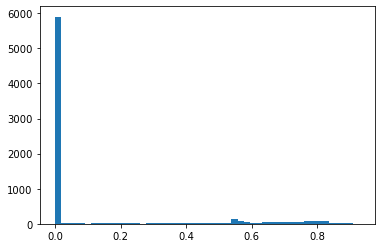

In [207]:
plt.hist(y, bins=50)
plt.show()

In [208]:
(y > 0.0).sum()

1422

In [322]:
X[0,:,1]

array([0.06822463])

In [325]:
X[0,:,0]

array([0.06822463])

In [282]:

encoder = BinaryEncoder(cols=['mission_id'], drop_invariant=True)
df_binary = encoder.fit_transform(df)

df_binary.head()

,event_id,time_to_tca,mission_id_1,mission_id_2,mission_id_3,mission_id_4,mission_id_5,risk,max_risk_estimate,max_risk_scaling,miss_distance,relative_speed,relative_position_r,relative_position_t,relative_position_n,relative_velocity_r,relative_velocity_t,relative_velocity_n,t_time_lastob_start,t_time_lastob_end,t_recommended_od_span,t_actual_od_span,t_obs_available,t_obs_used,t_residuals_accepted,t_weighted_rms,t_rcs_estimate,t_cd_area_over_mass,t_cr_area_over_mass,t_sedr,t_j2k_sma,t_j2k_ecc,t_j2k_inc,t_ct_r,t_cn_r,t_cn_t,t_crdot_r,t_crdot_t,t_crdot_n,t_ctdot_r,t_ctdot_t,t_ctdot_n,t_ctdot_rdot,t_cndot_r,t_cndot_t,t_cndot_n,t_cndot_rdot,t_cndot_tdot,c_object_type,c_time_lastob_start,c_time_lastob_end,c_recommended_od_span,c_actual_od_span,c_obs_available,c_obs_used,c_residuals_accepted,c_weighted_rms,c_rcs_estimate,c_cd_area_over_mass,c_cr_area_over_mass,c_sedr,c_j2k_sma,c_j2k_ecc,c_j2k_inc,c_ct_r,c_cn_r,c_cn_t,c_crdot_r,c_crdot_t,c_crdot_n,c_ctdot_r,c_ctdot_t,c_ctdot_n,c_ctdot_rdot,c_cndot_r,c_cndot_t,c_cndot_n,c_cndot_rdot,c_cndot_tdot,t_span,c_span,t_h_apo,t_h_per,c_h_apo,c_h_per,geocentric_latitude,azimuth,elevation,mahalanobis_distance,t_position_covariance_det,c_position_covariance_det,t_sigma_r,c_sigma_r,t_sigma_t,c_sigma_t,t_sigma_n,c_sigma_n,t_sigma_rdot,c_sigma_rdot,t_sigma_tdot,c_sigma_tdot,t_sigma_ndot,c_sigma_ndot,F10,F3M,SSN,AP
0,0,1.566798,0,0,0,0,1,-10.204955,-7.834756,8.602101,14923.0,13792.0,453.8,5976.6,-13666.8,-7.2,-12637.0,-5525.9,1.0,0.0,3.78,3.78,459,458,98.9,1.265,0.402,0.013826,0.007173,0.000051,6996.918867,0.003997,97.806412,-0.397969,0.292258,0.040799,0.394221,-0.999674,-0.038498,-0.981098,0.214612,-0.316493,-0.210247,0.170737,-0.001551,0.531593,0.002117,-0.179278,UNKNOWN,180.0,2.0,15.85,15.85,15.0,15.0,100.0,2.36,NaN,0.348701,0.126607,0.001406,7006.607320,0.003144,74.045735,-0.824859,0.473976,-0.002576,0.825216,-0.999998,0.003565,-0.732954,0.220006,-0.814249,-0.220621,0.249855,0.196620,0.722186,-0.196908,-0.668487,1.0,2.0,646.745439,590.818294,650.497251,606.443389,-73.574095,-23.618769,0.029910,129.430951,737347.125225,4.429923e+16,4.057932,266.722309,137.617114,54366.864909,1.781418,46.612573,0.147350,58.272095,0.004092,0.165044,0.002987,0.386462,89.0,83.0,42.0,11.0
1,0,1.207494,0,0,0,0,1,-10.355758,-7.848937,8.956374,14544.0,13792.0,474.3,5821.2,-13319.8,-7.0,-12637.0,-5525.9,1.0,0.0,3.79,3.79,456,455,98.5,1.270,0.402,0.013487,0.009139,0.000060,6996.920255,0.003996,97.806420,-0.073137,0.297366,0.060541,0.069652,-0.998192,-0.052511,-0.994240,-0.029644,-0.302333,0.034030,0.179696,0.001552,0.561142,-0.005165,-0.181036,UNKNOWN,180.0,2.0,15.85,15.85,15.0,15.0,100.0,2.36,NaN,0.348701,0.126607,0.001406,7006.621053,0.003144,74.045736,-0.818207,0.482754,-0.003578,0.818573,-0.999998,0.004574,-0.728759,0.202595,-0.817490,-0.203216,0.258964,0.195718,0.721903,-0.196008,-0.674979,1.0,2.0,646.743506,590.823004,650.513314,606.454793,-73.570690,-23.618769,0.029079,271.540424,114138.993569,4.378610e+16,3.526780,262.191819,56.070117,54082.067268,1.800959,46.595869,0.059672,57.966413,0.003753,0.164383,0.002933,0.386393,89.0,83.0,42.0,11.0
2,0,0.952193,0,0,0,0,1,-10.345631,-7.847406,8.932195,14475.0,13792.0,474.6,5796.2,-13256.1,-7.0,-12637.0,-5525.9,1.0,0.0,3.79,3.80,456,455,98.5,1.257,0.402,0.013357,0.007057,0.000060,6996.920553,0.003996,97.806418,-0.109230,0.305189,0.043711,0.107079,-0.996235,-0.034287,-0.996674,0.033933,-0.308501,-0.030161,0.123760,0.019630,0.579274,-0.023726,-0.125737,UNKNOWN,180.0,2.0,15.85,15.85,15.0,15.0,100.0,2.36,NaN,0.348701,0.126607,0.001406,7006.623524,0.003144,74.045737,-0.817408,0.483828,-0.003742,0.817774,-0.999998,0.004738,-0.729083,0.201698,-0.817662,-0.202320,0.260092,0.195558,0.721854,-0.195849,-0.675347,1.0,2.0,646.745607,590.821499,650.515082,606.457965,-73.570088,-23.618769,0.029079,347.899292,46960.041117,4.369105e+16,3.362037,261.666544,37.497947,54027.391201,1.821940,46.592757,0.039258,57.907599,0.003576,0.164352,0.002967,0.386381,89.0,83.0,42.0,11.0
3,0,0.579669,0,0,0,0,1,

In [283]:
df_binary["aaa"] = ""
for i in range(1,6):
    df_binary["aaa"] = df_binary["aaa"]  + df_binary['mission_id_'+str(i)].astype(str)

In [284]:
df_binary["aaa"].value_counts()

00001    28649
00101    24746
00100    24072
00010    23730
00111    20785
00011    10429
01000     7816
01001     7103
01011     5644
00110     4245
01010     1770
01101     1149
01100      996
10000      419
01110      355
10001      317
01111      258
10010      101
10011       50
Name: aaa, dtype: int64

In [285]:
df['mission_id'].value_counts()

5     28649
15    24746
1     24072
2     23730
7     20785
19    10429
6      7816
3      7103
9      5644
4      4245
18     1770
16     1149
10      996
20      419
22      355
24      317
23      258
14      101
13       50
Name: mission_id, dtype: int64

In [286]:
df = pd.read_csv("train_data.csv")

In [293]:
df["event_length"] = df.groupby('event_id')['event_id'].transform('value_counts')
df

,event_id,time_to_tca,mission_id,risk,max_risk_estimate,max_risk_scaling,miss_distance,relative_speed,relative_position_r,relative_position_t,relative_position_n,relative_velocity_r,relative_velocity_t,relative_velocity_n,t_time_lastob_start,t_time_lastob_end,t_recommended_od_span,t_actual_od_span,t_obs_available,t_obs_used,t_residuals_accepted,t_weighted_rms,t_rcs_estimate,t_cd_area_over_mass,t_cr_area_over_mass,t_sedr,t_j2k_sma,t_j2k_ecc,t_j2k_inc,t_ct_r,t_cn_r,t_cn_t,t_crdot_r,t_crdot_t,t_crdot_n,t_ctdot_r,t_ctdot_t,t_ctdot_n,t_ctdot_rdot,t_cndot_r,t_cndot_t,t_cndot_n,t_cndot_rdot,t_cndot_tdot,c_object_type,c_time_lastob_start,c_time_lastob_end,c_recommended_od_span,c_actual_od_span,c_obs_available,c_obs_used,c_residuals_accepted,c_weighted_rms,c_rcs_estimate,c_cd_area_over_mass,c_cr_area_over_mass,c_sedr,c_j2k_sma,c_j2k_ecc,c_j2k_inc,c_ct_r,c_cn_r,c_cn_t,c_crdot_r,c_crdot_t,c_crdot_n,c_ctdot_r,c_ctdot_t,c_ctdot_n,c_ctdot_rdot,c_cndot_r,c_cndot_t,c_cndot_n,c_cndot_rdot,c_cndot_tdot,t_span,c_span,t_h_apo,t_h_per,c_h_apo,c_h_per,geocentric_latitude,azimuth,elevation,mahalanobis_distance,t_position_covariance_det,c_position_covariance_det,t_sigma_r,c_sigma_r,t_sigma_t,c_sigma_t,t_sigma_n,c_sigma_n,t_sigma_rdot,c_sigma_rdot,t_sigma_tdot,c_sigma_tdot,t_sigma_ndot,c_sigma_ndot,F10,F3M,SSN,AP,aaaa
0,0,1.566798,5,-10.204955,-7.834756,8.602101,14923.0,13792.0,453.8,5976.6,-13666.8,-7.2,-12637.0,-5525.9,1.0,0.0,3.78,3.78,459,458,98.9,1.265,0.4020,0.013826,0.007173,0.000051,6996.918867,0.003997,97.806412,-0.397969,0.292258,0.040799,0.394221,-0.999674,-0.038498,-0.981098,0.214612,-0.316493,-0.210247,0.170737,-0.001551,0.531593,0.002117,-0.179278,UNKNOWN,180.0,2.0,15.85,15.85,15.0,15.0,100.0,2.360,NaN,0.348701,0.126607,0.001406,7006.607320,0.003144,74.045735,-0.824859,0.473976,-0.002576,0.825216,-0.999998,0.003565,-0.732954,0.220006,-0.814249,-0.220621,0.249855,0.196620,0.722186,-0.196908,-0.668487,1.0,2.0,646.745439,590.818294,650.497251,606.443389,-73.574095,-23.618769,0.029910,129.430951,7.373471e+05,4.429923e+16,4.057932,266.722309,137.617114,54366.864909,1.781418,46.612573,0.147350,58.272095,0.004092,0.165044,0.002987,0.386462,89.0,83.0,42.0,11.0,5
1,0,1.207494,5,-10.355758,-7.848937,8.956374,14544.0,13792.0,474.3,5821.2,-13319.8,-7.0,-12637.0,-5525.9,1.0,0.0,3.79,3.79,456,455,98.5,1.270,0.4020,0.013487,0.009139,0.000060,6996.920255,0.003996,97.806420,-0.073137,0.297366,0.060541,0.069652,-0.998192,-0.052511,-0.994240,-0.029644,-0.302333,0.034030,0.179696,0.001552,0.561142,-0.005165,-0.181036,UNKNOWN,180.0,2.0,15.85,15.85,15.0,15.0,100.0,2.360,NaN,0.348701,0.126607,0.001406,7006.621053,0.003144,74.045736,-0.818207,0.482754,-0.003578,0.818573,-0.999998,0.004574,-0.728759,0.202595,-0.817490,-0.203216,0.258964,0.195718,0.721903,-0.196008,-0.674979,1.0,2.0,646.743506,590.823004,650.513314,606.454793,-73.570690,-23.618769,0.029079,271.540424,1.141390e+05,4.378610e+16,3.526780,262.191819,56.070117,54082.067268,1.800959,46.595869,0.059672,57.966413,0.003753,0.164383,0.002933,0.386393,89.0,83.0,42.0,11.0,5
2,0,0.952193,5,-10.345631,-7.847406,8.932195,14475.0,13792.0,474.6,5796.2,-13256.1,-7.0,-12637.0,-5525.9,1.0,0.0,3.79,3.80,456,455,98.5,1.257,0.4020,0.013357,0.007057,0.000060,6996.920553,0.003996,97.806418,-0.109230,0.305189,0.043711,0.107079,-0.996235,-0.034287,-0.996674,0.033933,-0.308501,-0.030161,0.123760,0.019630,0.579274,-0.023726,-0.125737,UNKNOWN,180.0,2.0,15.85,15.85,15.0,15.0,100.0,2.360,NaN,0.348701,0.126607,0.001406,7006.623524,0.003144,74.045737,-0.817408,0.483828,-0.003742,0.817774,-0.999998,0.004738,-0.729083,0.201698,-0.817662,-0.202320,0.260092,0.195558,0.721854,-0.195849,-0.675347,1.0,2.0,646.745607,590.821499,650.515082,606.457965,-73.570088,-23.618769,0.029079,347.899292,4.696004e+04,4.369105e+16,3.362037,261.666544,37.497947,54027.391201,1.821940,46.592757,0.039258,57.907599,0.003576,0.164352,0.002967,0.386381,89.0,83.0,42.0,11.0,5
3,0,0.579669,5,-10.337809,-7.845880,8.913444,14579.0,13792.0,472.7,5838.9,-13350.7,-7.

In [289]:
df.groupby('event_id')['event_id'].value_counts()

event_id  event_id
0         0            5
1         1            4
2         2           20
3         3           21
4         4            9
                      ..
13149     13149        4
13150     13150        4
13151     13151        6
13152     13152       21
13153     13153       13
Name: event_id, Length: 13154, dtype: int64